In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)

%matplotlib inline

In [154]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('data/input/ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/input/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('data/input/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

## Purpose

Create a movie recommendation engine that would recommend movies that would have a high chance of being enjoyed by the user.

#### Q1. What are the 25 most rated movies?

Now we know which are the most popular movies

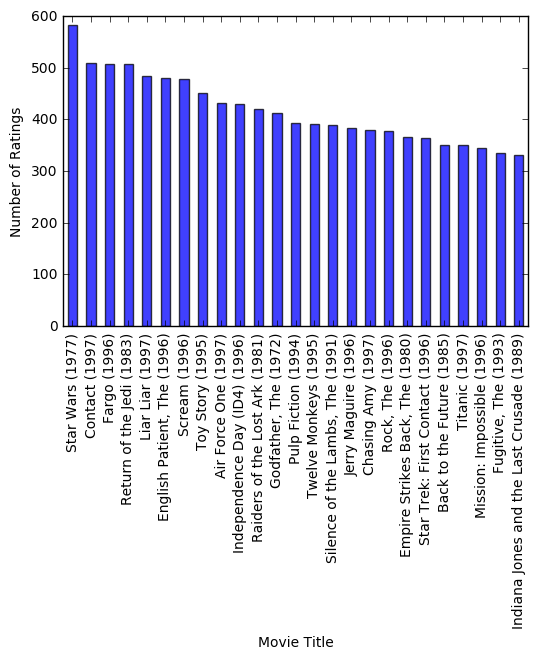

In [3]:
most_rated_25 = lens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated_25.plot(kind='bar',alpha=0.75, rot=90)
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')

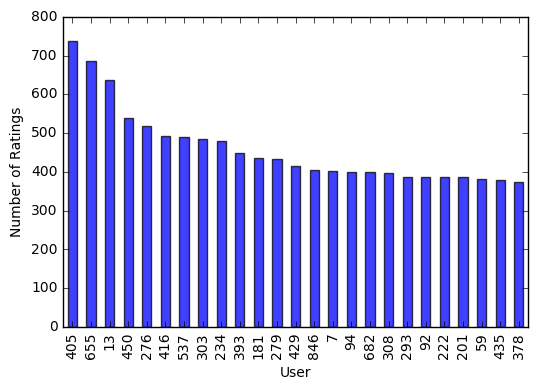

In [4]:
most_rated_25_user = lens.groupby('user_id').size().sort_values(ascending=False)[:25]
most_rated_25_user.plot(kind='bar',alpha=0.75, rot=90)
plt.xlabel('User')
plt.ylabel('Number of Ratings')

#### Q2. Which movies are most highly rated?

In [5]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.columns = ['ratingSize','averagefRatings']
movie_stats.sort_values([('averagefRatings')], ascending=False).head() # sort by rating average

,ratingSize,averagefRatings
title,,
They Made Me a Criminal (1939),1,5.0
Marlene Dietrich: Shadow and Light (1996),1,5.0
"Saint of Fort Washington, The (1993)",2,5.0
Someone Else's America (1995),1,5.0
Star Kid (1997),3,5.0


This shows a problem because the top movies have small number of rating so it's not reflecting the true highly rated movie. 

Filter by moview with over 100 rating

In [6]:
atleast_100 = movie_stats['ratingSize'] >= 100
movie_stats[atleast_100].sort_values([('averagefRatings')], ascending=False)[:25].head(25)

,ratingSize,averagefRatings
title,,
"Close Shave, A (1995)",112,4.491071
Schindler's List (1993),298,4.466443
"Wrong Trousers, The (1993)",118,4.466102
Casablanca (1942),243,4.456790
"Shawshank Redemption, The (1994)",283,4.445230
Rear Window (1954),209,4.387560
"Usual Suspects, The (1995)",267,4.385768
Star Wars (1977),583,4.358491
12 Angry Men (1957),125,4.344000


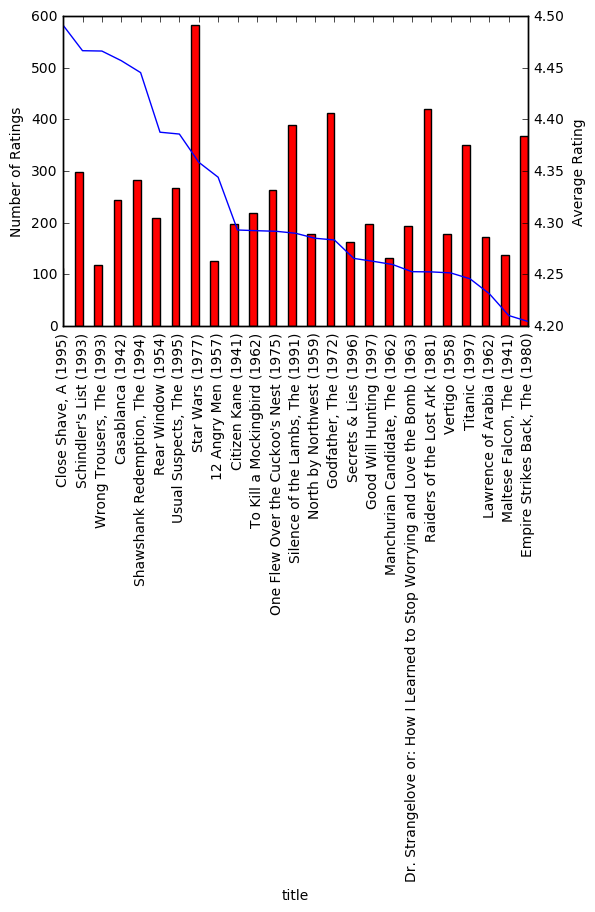

In [7]:
store_df = movie_stats[atleast_100].sort_values([('averagefRatings')], ascending=False)[:25]

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

store_df.ratingSize.plot(kind='bar', color='red', ax=ax, width=width, position=1)
store_df.averagefRatings.plot(color='blue',ax=ax2)

ax.set_ylabel('Number of Ratings')
ax2.set_ylabel('Average Rating')

plt.show()


#### Q3. Which movies are most controversial amongst different ages?

First look at how age is distributed amongst our users

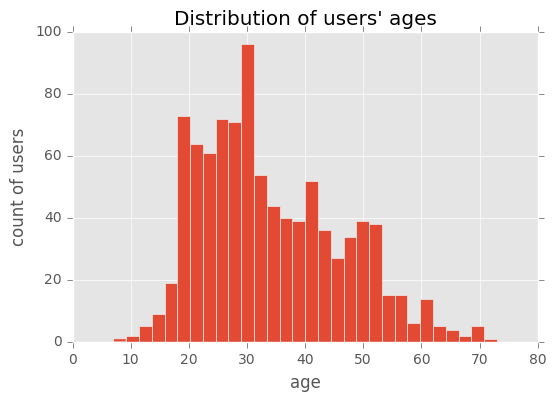

In [67]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.style.use('ggplot')
plt.xlabel('age');

bin uers' age into age groups 

In [155]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


In [156]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [157]:
lens.columns

Index(['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
       'user_id', 'rating', 'unix_timestamp', 'age', 'sex', 'occupation',
       'zip_code', 'age_group'],
      dtype='object')

Young users seem a bit more critical than other age groups(reflected from the size of it)

Let's look at how the 50 most rated movies are viewed across each age group.

In [167]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

In [169]:
lens.set_index('movie_id', inplace=True)
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

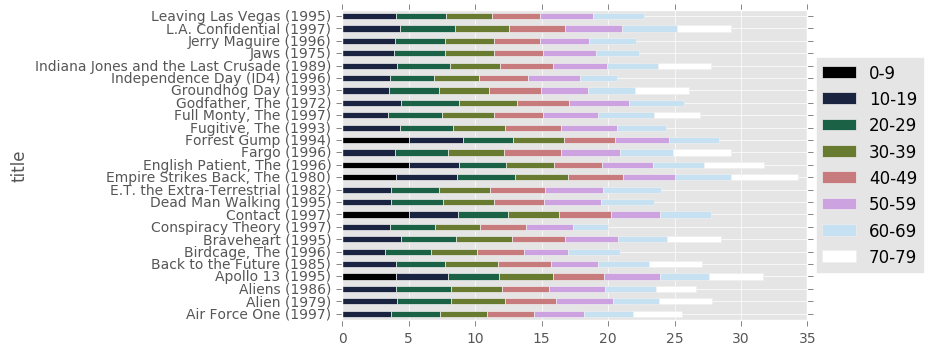

In [179]:
by_age.rating.mean().unstack(1).fillna(0)[:25].plot.barh(stacked=True,colormap='cubehelix')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

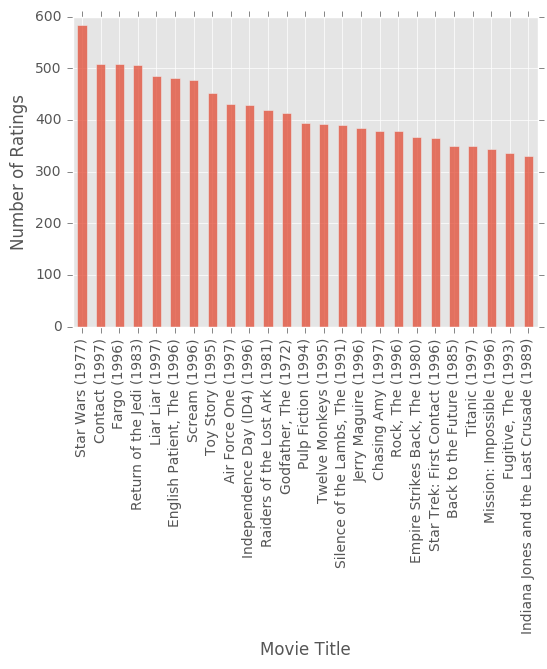

In [84]:
most_rated_25 = lens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated_25.plot(kind='bar',alpha=0.75, rot=90)
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')

In [14]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,20-29,30-39,60-69
title,,,
"Christmas Carol, A (1938)",0.0,0.0,4.0
"Client, The (1994)",0.0,0.0,3.0
Dances with Wolves (1990),0.0,0.0,1.0
"Deer Hunter, The (1978)",0.0,0.0,3.0
Delicatessen (1991),0.0,0.0,4.0
Die Hard (1988),0.0,0.0,3.0
East of Eden (1955),0.0,0.0,3.0
Eat Drink Man Woman (1994),0.0,0.0,4.0
Everyone Says I Love You (1996),0.0,0.0,4.0


#### Q4. Which movies do men and women most disagree on?

In [181]:
lens.reset_index('movie_id', inplace=True)

In [16]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [17]:
# create a colume to cature the difference in rate between male and femal
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [18]:
pivoted.reset_index('movie_id', inplace=True)

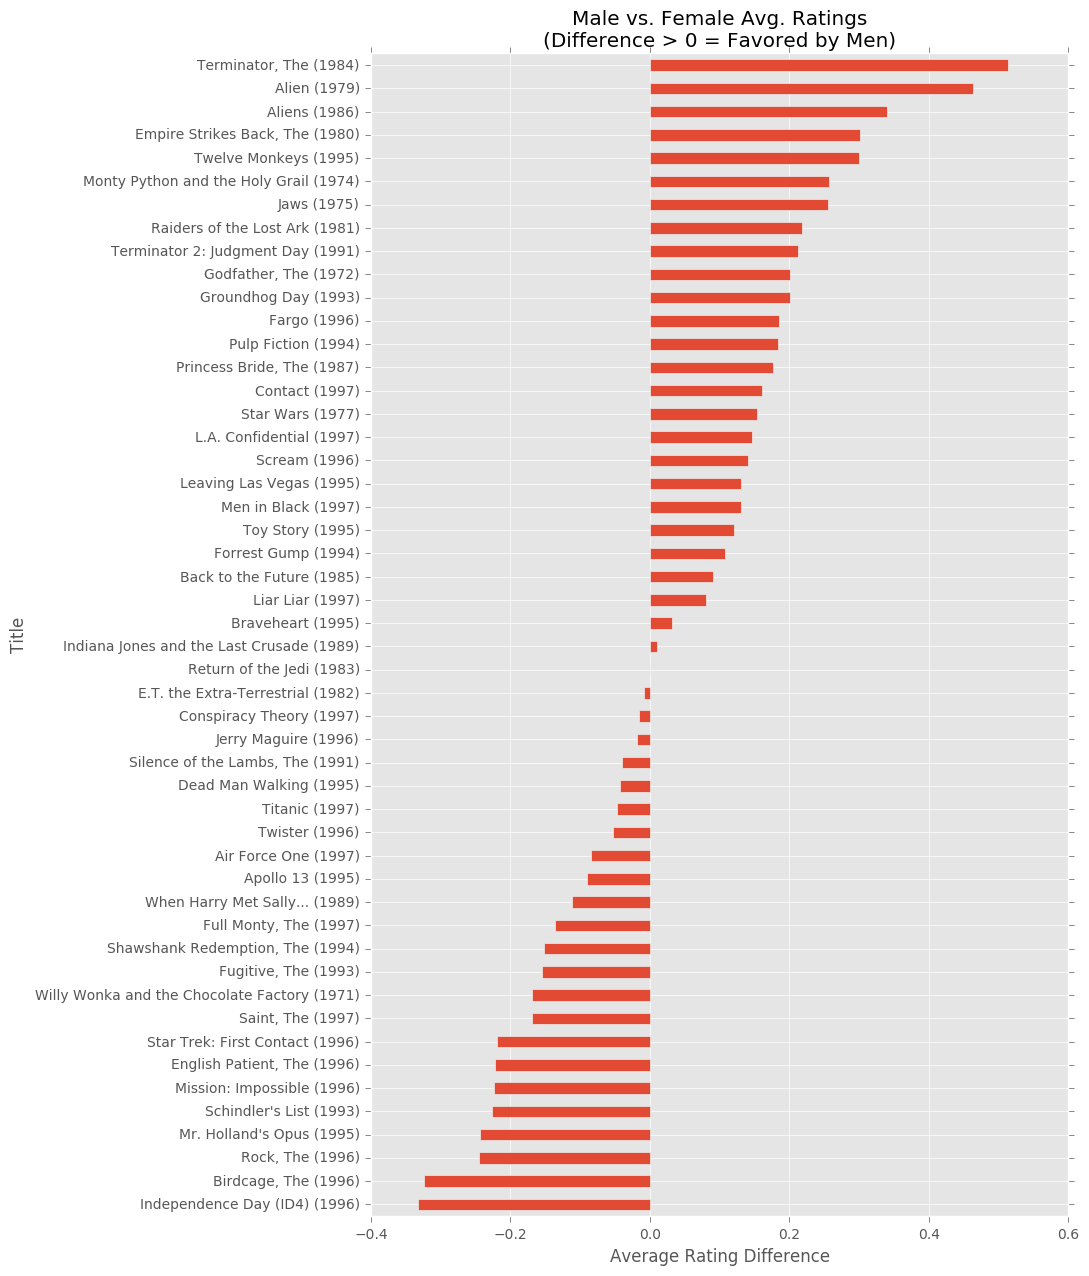

In [19]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff'] # get the diff of the top 50 movie 
disagreements.sort_values().plot(kind='barh', figsize=[9, 15]) # sort the diff value and plot
plt.style.use('ggplot')
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

This shows that certain movies like Termintaor, Alien, Aliens are male preferred movie. 

Movie like birdcage, Mr.Holland's Opux , star trek are female preferred movie.

However,this may not be best representative considering independence date as most female-preferred movie